# oasis Infobyte

## Batch - March P2

## Data Science Internship

### Task 3: Car price prediction with machine learning

### Intern Name: Poulami Ghosh

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
URL = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv'
Car = pd.read_csv(URL)

In [3]:
Car.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
Car.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
CP=Car.drop(columns='car_ID')
CP.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Exploratory Data Analysis

In [6]:
CP.shape

(205, 25)

In [7]:
CP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [8]:
CP.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
CP.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [10]:
CP['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [11]:
CP['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [12]:
CP['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [13]:
CP['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [14]:
CP['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [15]:
CP['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [16]:
CP['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [17]:
CP['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [18]:
CP['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
97.3     7
Name: wheelbase, dtype: int64

In [19]:
CP['carlength'].value_counts().head()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
Name: carlength, dtype: int64

In [20]:
CP['carwidth'].value_counts().head()

63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
Name: carwidth, dtype: int64

In [21]:
CP['carheight'].value_counts().head()

50.8    14
52.0    12
55.7    12
54.1    10
54.5    10
Name: carheight, dtype: int64

In [22]:
CP['curbweight'].value_counts()

2385    4
1918    3
2275    3
1989    3
2410    2
       ..
2370    1
2328    1
2833    1
2921    1
3062    1
Name: curbweight, Length: 171, dtype: int64

In [23]:
CP['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [24]:
CP['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [25]:
CP['enginesize'].value_counts().head()

122    15
92     15
97     14
98     14
108    13
Name: enginesize, dtype: int64

In [26]:
CP['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [27]:
CP['boreratio'].value_counts().head()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
Name: boreratio, dtype: int64

In [28]:
CP['stroke'].value_counts().head()

3.40    20
3.23    14
3.15    14
3.03    14
3.39    13
Name: stroke, dtype: int64

In [29]:
CP['compressionratio'].value_counts().head()

9.0    46
9.4    26
8.5    14
9.5    13
9.3    11
Name: compressionratio, dtype: int64

In [30]:
CP['horsepower'].value_counts().head()

68     19
70     11
69     10
116     9
110     8
Name: horsepower, dtype: int64

In [31]:
CP['peakrpm'].value_counts().head()

5500    37
4800    36
5000    27
5200    23
5400    13
Name: peakrpm, dtype: int64

In [32]:
CP['citympg'].value_counts().head()

31    28
19    27
24    22
27    14
17    13
Name: citympg, dtype: int64

In [33]:
CP['highwaympg'].value_counts().head()

25    19
38    17
24    17
30    16
32    16
Name: highwaympg, dtype: int64

In [34]:
CP.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [35]:
def number_(x):
    return x.map({'four':4, 'two': 2})
    
CP['doornumber'] = CP[['doornumber']].apply(number_)
CP[['doornumber']].head()

,doornumber
0,2
1,2
2,2
3,4
4,4


In [36]:
def convert_number(x):
    return x.map({'four': 4,
                  'six': 6,
                  'five': 5,
                  'eight': 8,
                  'two': 2,
                  'three': 3,
                  'twelve': 12}
                 )

CP['cylindernumber'] = CP[['cylindernumber']].apply(convert_number)
CP['cylindernumber'].head()

0    4
1    4
2    6
3    4
4    5
Name: cylindernumber, dtype: int64

## Data Pre-processing

In [37]:
CP.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [38]:
CP.duplicated().any()

False

In [39]:
CP.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Visualization

In [40]:
CP.corr() #checking correlation

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
doornumber,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,-0.531954,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.113129,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.105790,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.119258,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173


<AxesSubplot:>

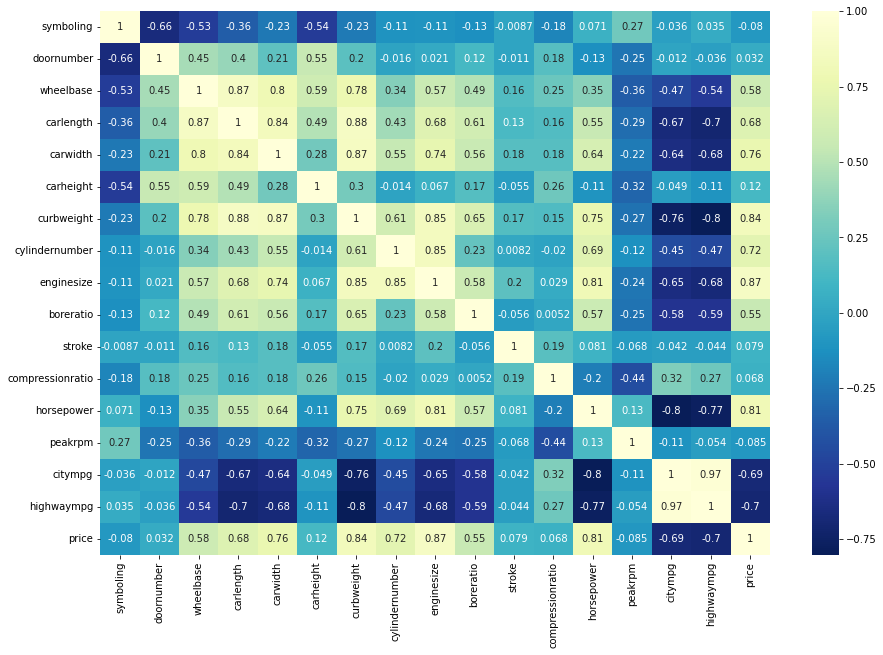

In [41]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(data=CP.corr(), cmap='YlGnBu_r', annot=True)

In [44]:
CP_categorical=CP.select_dtypes(include=['object'])
CP_categorical.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi


<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

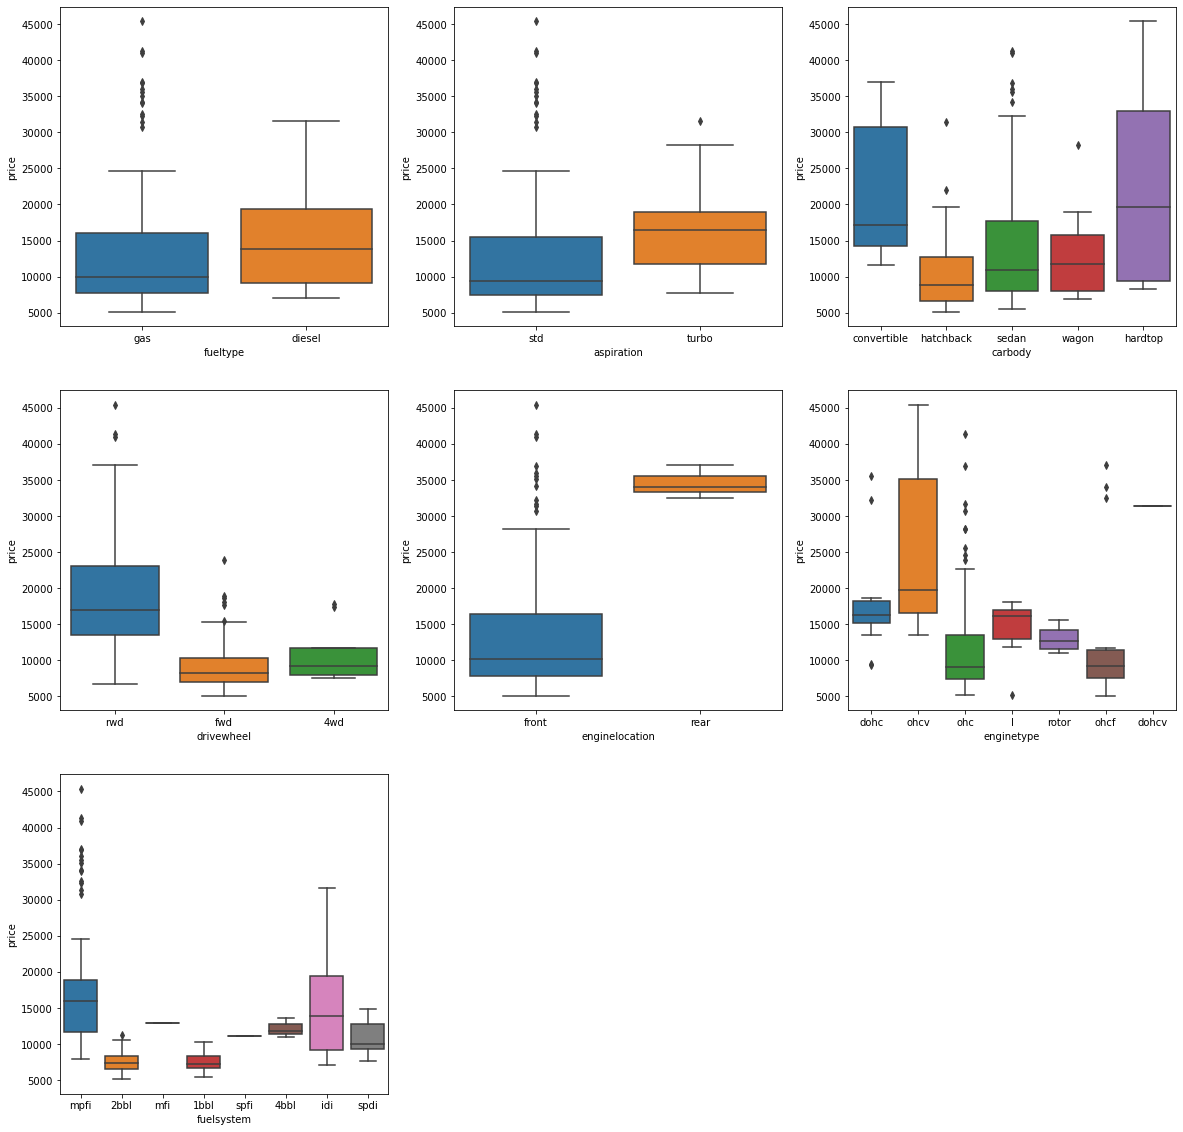

In [45]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1) # 3 rows, 3 columns, 1st subplot = left
sns.boxplot(x='fueltype', y='price', data=CP)

plt.subplot(3, 3, 2) # 3 rows, 3 columns, 2nd subplot = middle
sns.boxplot(x='aspiration', y='price', data=CP)

plt.subplot(3, 3, 3) # 3 rows, 3 columns, 3rd subplot = right
sns.boxplot(x='carbody', y='price', data=CP)

plt.subplot(3, 3, 4)
sns.boxplot(x='drivewheel', y='price', data=CP)

plt.subplot(3, 3, 5)
sns.boxplot(x='enginelocation', y='price', data=CP)

plt.subplot(3, 3, 6)
sns.boxplot(x='enginetype', y='price', data=CP)

plt.subplot(3, 3, 7)
sns.boxplot(x='fuelsystem', y='price', data=CP)

## Encoding categorical columns

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
CP['CarName_New']=le.fit_transform(CP['CarName'])
CP['fueltype_New']=le.fit_transform(CP['fueltype'])
CP['aspiration_New']=le.fit_transform(CP['aspiration'])
CP['carbody_New']=le.fit_transform(CP['carbody'])
CP['drivewheel_New']=le.fit_transform(CP['drivewheel'])
CP['enginelocation_New']=le.fit_transform(CP['enginelocation'])
CP['enginetype_New']=le.fit_transform(CP['enginetype'])
CP['fuelsystem_New']=le.fit_transform(CP['fuelsystem'])

CP

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,highwaympg,price,CarName_New,fueltype_New,aspiration_New,carbody_New,drivewheel_New,enginelocation_New,enginetype_New,fuelsystem_New
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,...,27,13495.0,2,1,0,0,2,0,0,5
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,...,27,16500.0,3,1,0,0,2,0,0,5
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,...,26,16500.0,1,1,0,2,2,0,5,5
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,...,30,13950.0,4,1,0,3,1,0,3,5
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,...,22,17450.0,5,1,0,3,0,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,188.8,...,28,16845.0,139,1,0,3,2,0,3,5
201,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,25,19045.0,138,1,1,3,2,0,3,5
202,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,188.8,...,23,21485.0,140,1,0,3,2,0,5,5
203,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,27,22470.0,142,0,1,3,2,0,3,3


In [48]:
CP_new=CP.drop(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'], axis='columns')
CP_new

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,highwaympg,price,CarName_New,fueltype_New,aspiration_New,carbody_New,drivewheel_New,enginelocation_New,enginetype_New,fuelsystem_New
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,27,13495.0,2,1,0,0,2,0,0,5
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,27,16500.0,3,1,0,0,2,0,0,5
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,26,16500.0,1,1,0,2,2,0,5,5
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,30,13950.0,4,1,0,3,1,0,3,5
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,22,17450.0,5,1,0,3,0,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,...,28,16845.0,139,1,0,3,2,0,3,5
201,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,25,19045.0,138,1,1,3,2,0,3,5
202,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,...,23,21485.0,140,1,0,3,2,0,5,5
203,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,...,27,22470.0,142,0,1,3,2,0,3,3


## Preparing Data for Model

In [49]:
x=CP_new.drop(columns='price')
y=CP_new['price']

In [50]:
x

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,citympg,highwaympg,CarName_New,fueltype_New,aspiration_New,carbody_New,drivewheel_New,enginelocation_New,enginetype_New,fuelsystem_New
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,21,27,2,1,0,0,2,0,0,5
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,21,27,3,1,0,0,2,0,0,5
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,19,26,1,1,0,2,2,0,5,5
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,24,30,4,1,0,3,1,0,3,5
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,18,22,5,1,0,3,0,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,...,23,28,139,1,0,3,2,0,3,5
201,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,19,25,138,1,1,3,2,0,3,5
202,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,...,18,23,140,1,0,3,2,0,5,5
203,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,...,26,27,142,0,1,3,2,0,3,3


In [51]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [52]:
x=np.array(x)
y=np.array(y)

In [53]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

## Scaling Data

In [54]:
from sklearn.preprocessing import StandardScaler
st_sc=StandardScaler()

In [55]:
x_train_sc=st_sc.fit_transform(x_train)
x_test_sc=st_sc.fit_transform(x_test)

## Model Training

In [56]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train_sc,y_train)

RandomForestRegressor()

In [57]:
y_pred=RF.predict(x_test_sc)
y_pred

array([ 7331.67   , 17425.76   , 16083.98334,  5922.82   ,  9913.41   ,
       14873.31167,  7311.88   ,  8862.36   , 15830.28   ,  7697.11   ,
       19086.33   , 34495.36   , 13406.84   , 14807.02167,  6793.98   ,
       14174.42167, 13195.94   , 20358.61334,  9802.97   ,  7363.89   ,
       10477.6    , 14914.19   , 12777.15   , 14979.27167, 16404.94167,
        7335.33   ,  7985.17   , 15103.77   ,  8007.49   ,  8208.94   ,
        9246.9    , 13315.42   , 15984.85167, 11007.1    ,  7439.89   ,
       32455.59   , 10426.15   , 15200.74   ,  6563.64   , 36052.08   ,
        6624.54   ])

## Finding different score

In [59]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R2_score:", metrics.r2_score(y_test, y_pred))

MAE: 2195.3990248780487
MSE: 8854142.852409406
R2_score: 0.8856295613002418


### The score we get by applying Random Forest is 88.56%